In [5]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use("ggplot")

In [6]:
colors = 10*["g","r","c","b","k"]

In [7]:
#Taking 2 dimensional dummy data (Algo works for any number of dimensions)
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
             [8,8],
              [1,0.6],
             [9,11]])
X

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [8]:
for featureset in X:
    print(featureset)

[1. 2.]
[1.5 1.8]
[5. 8.]
[8. 8.]
[1.  0.6]
[ 9. 11.]


In [10]:
dist = [0.69,0,73257]
dist.index(min(dist))

1

In [27]:
row = [100,200,300,400]
centroids = {0:[1,2],1:[1.5,1.8]}
classifications = {0:[],1:[]}
for featureset in X:
    distances = [np.linalg.norm(featureset - centroids[centroid]) 
         for centroid in centroids]
    cluster_no = distances.index(min(distances))
    classifications[cluster_no].append(featureset)
print(classifications[1])
print(np.average(classifications[1],axis = 0))
centroids[0] = np.average(classifications[0],axis = 0)
centroids[1] = np.average(classifications[1],axis = 0)
centroids

[array([1.5, 1.8]), array([5., 8.]), array([8., 8.]), array([1. , 0.6]), array([ 9., 11.])]
[4.9  5.88]


{0: array([1., 2.]), 1: array([4.9 , 5.88])}

In [43]:
optimised = True
o_c = np.array([1.5,1.8])
c_c = np.array([4.9,5.88]) #[226,226] > 0.01 --> np.sum([True,True])
if np.sum(((c_c-o_c)/o_c)*100>0.01):
    optimised = False

In [46]:
#Making a class for K_Means classifier with functions like fit and predict
class K_Means: #Taken from sklearn library 
    
    def __init__(self,k=2,tol=0.001,max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        #self.all_c = {}
   
    def fit(self,data): #Used for training classifier
        #fig = plt.figure()
        #ax = plt.axes()
        
        #def cenPlot(cent): #used to plot the path of centroids
            #for centroid in cent:
                #plt.scatter(cent[centroid][0],cent[centroid][1],marker='x',s=50)
                #plt.plot(cent[centroid][0],cent[centroid][1])
                
            #plt.show() #comment this line if you want everything in 1 graph
            
        self.centroids = {} #{0:[1,2], 1:[1.5,1.8]}
        for i in range(self.k): #1
            self.centroids[i] = data[i]
            #self.all_c[i] = [[data[i][0]],[data[i][1]]]
            
            
        for i in range(self.max_iter):
            self.classifications = {} #{0:[],1:[]} --> Cluster Dictionary
            for i in range(self.k):
                self.classifications[i] = []
                            
            for featureset in data: #Finding distances from all centroids and comparing them for each point in dataset
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) 
                             for centroid in self.centroids]
                classification = distances.index(min(distances)) #Taking index of minimum distance
                self.classifications[classification].append(featureset) #classifying point to cluster of min distance
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications: #0,1
                
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                #self.all_c[classification][0].append(self.centroids[classification][0])
                #self.all_c[classification][1].append(self.centroids[classification][1])
                
            optimized = True
            
            for c in self.centroids: #0 --> 1
                original_centroid = prev_centroids[c] #[1,2]
                current_centroid = self.centroids[c] #[1,2]
                if np.sum(((current_centroid-original_centroid)/original_centroid)*100 > self.tol): 
                    #checking if clusters moved significantly (acc. to tolerancne value)
                    optimized = False
                    
            if optimized:
                #cenPlot(self.all_c)
                break
                    
        #anim = animation.FuncAnimation(fig,animate,1000)
        #plt.show()
        
    def predict(self,data):
        distances = [np.linalg.norm(data-
                            self.centroids[centroid]) 
                     for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
0


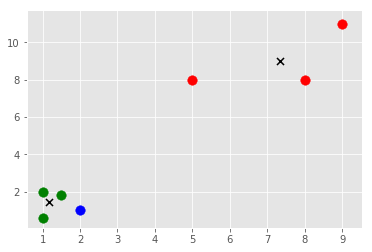

In [53]:
clf = K_Means(k=2,tol=0.001,max_iter=300)
clf.fit(X)
print(clf.centroids)
print(clf.predict([2,1]))
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],
                    marker = "o",s=90,
                    color = color)
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],
                clf.centroids[centroid][1],
                marker = "x" , 
                color = "k",s=50)
#print(clf.all_c)
plt.scatter(2,1,color='b',s = 90)
plt.show()

In [22]:
print(clf.centroids)

{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}
